## Mini Project 2 : Wine Recognition Classification

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Magnesium:                    70.0 162.0    99.7  14.3
    Total Phenols:                0.98  3.88    2.29  0.63
    Flavanoids:                   0.34  5.08    2.03  1.00
    Nonflavanoid Phenols:         0.13  0.66    0.36  0.12
    Proanthocyanins:              0.41  3.58    1.59  0.57
    Colour Intensity:              1.3  13.0     5.1   2.3
    Hue:                          0.48  1.71    0.96  0.23
    OD280/OD315 of diluted wines: 1.27  4.00    2.61  0.71
    Proline:                       278  1680     746   315
    ============================= ==== ===== ======= =====

    :Missing Attribute Values: None
    :Class Distribution: class_0 (59), class_1 (71), class_2 (48)
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

This is a copy of UCI ML Wine recognition datasets.
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same
region in Italy by three different cultivators. There are thirteen different
measurements taken for different constituents found in the three types of
wine.

In [1]:
import pandas as pd
import numpy as np
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import math
#To plot the graph embedded in the notebook
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [2]:
data = load_wine()
print (data.feature_names)
print (data.target_names)
#print (data.DESCR)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


## Data Preprocessing

In [3]:
#dataset is shrunk to 2 target columns: alcohol and malic acid
features = data.data[:, [0,2]]
target = data.target

print (features.shape)
print (target.shape)

(178, 2)
(178,)


In [4]:
#build column alcohol and malic acid
data = features[:, [0,1]]
matrix = pd.DataFrame(data, columns = ['alcohol', 'malic_acid'])
print (matrix.head())

   alcohol  malic_acid
0    14.23        2.43
1    13.20        2.14
2    13.16        2.67
3    14.37        2.50
4    13.24        2.87


In [5]:
#no missing data
matrix.isnull().sum()

alcohol       0
malic_acid    0
dtype: int64

## Data Analysis : Split Data vs. K-folds

(142, 2) (142, 1)
(36, 2) (36, 1)
69.44%



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


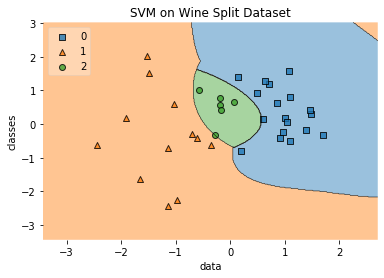

In [108]:
#1, split, predict on test
#data preprocessing
x = preprocessing.scale(data)
y = np.array(target).reshape(-1,1)

#split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=40)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

#svm
clf_svm = SVC(gamma = 'auto', kernel = 'rbf', probability=True)
clf_svm.fit(X_train, Y_train)

#prediction test
ypred_1 = clf_svm.predict(X_test)

#accuracy
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, ypred_1)))

# Plotting decision regions
plot_decision_regions(X_test, ypred_1, clf=clf_svm, legend=2)

# Adding axes titles
plt.title('SVM on Wine Split Dataset')
plt.xlabel('data')
plt.ylabel('classes')

plt.show()

Confusion Matrix for Split Dataset 



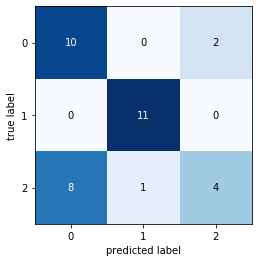

In [106]:
#confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

confusion_matrix = metrics.confusion_matrix(Y_test, ypred_1)
confusion_matrix = np.array(confusion_matrix)
# #not accurate, bc I have 3 classes now
print ("Confusion Matrix for Split Dataset \n")
class_names = ['class 0', 'class 1', 'class 2']

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix)
plt.show()

(142, 2) (142, 3)
(36, 2) (36, 3)
(36, 3)
Average precision-recall score: 0.77


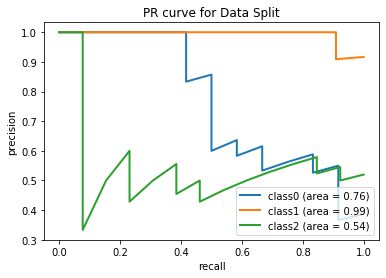

In [107]:
#PR curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

#We create a multi-label dataset, to illustrate the precision-recall 
#in multi-label settings
#number of classes
n_classes = len(set(target))
Y = label_binarize(target, classes=[*range(n_classes)])

#re-split data for multilabeling 
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x, Y, test_size=0.2, random_state=40)
print (X_train1.shape, Y_train1.shape)
print (X_test1.shape, Y_test1.shape)

clf_svm1 = SVC(gamma = 'auto', kernel = 'rbf', probability=True)

classifier = OneVsRestClassifier(clf_svm1)
classifier.fit(X_train1, Y_train1)
y_score1 = classifier.decision_function(X_test1)
print (y_score1.shape)

#PR curve
precision = dict()
recall = dict()
roc_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test1[:, i],
                                                        y_score1[:, i])
    roc_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class{0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

average_precision = average_precision_score(Y_test1, y_score1)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="lower right")
plt.title("PR curve for Data Split")
plt.show()

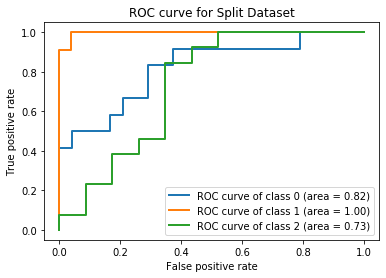

In [113]:
#ROC curve
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test1[:, i],
                                  y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc="best")
plt.title("ROC curve for Split Dataset")
plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

(143, 2) (143, 1)
(35, 2) (35, 1)
scores from each iteration [0.6944444444444444, 0.8333333333333334, 0.7222222222222222, 0.6857142857142857, 0.6857142857142857]
average k-fold score 0.7242857142857144


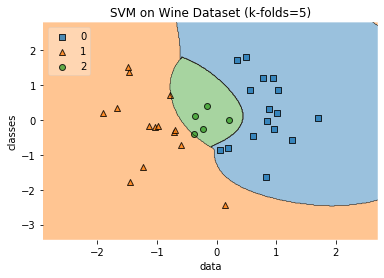

In [109]:
#2, k-folds=5 for multiclass
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

x = preprocessing.scale(data)
y = np.array(target).reshape(-1,1)

kf = KFold(n_splits=5, shuffle=True)
clf_svm2 =  SVC(gamma = 'auto', kernel = 'rbf', probability=True)

scores = []
for train, test in kf.split(x, y):
    #train for k-1 folds
    X_train2 = x[train]
    X_test2 = x[test]
    Y_train2 = y[train]
    Y_test2 = y[test]
    model = clf_svm2.fit(X_train2, Y_train2)
    ypred_2 = clf_svm2.predict(X_test2)
    scores.append(model.score(X_test2, Y_test2))

print(X_train2.shape, Y_train2.shape)
print(X_test2.shape, Y_test2.shape)

print ('scores from each iteration', scores)
print ('average k-fold score', np.mean(scores))

cross_val_score(clf_svm2, X_test2, Y_test2, cv=5)

# Plotting decision regions
plot_decision_regions(X_test2, ypred_2, clf=clf_svm2, legend=2)

# Adding axes titles
plt.title('SVM on Wine Dataset (k-folds=5)')
plt.xlabel('data')
plt.ylabel('classes')

plt.show()

Confusion Matrix k-folds=5



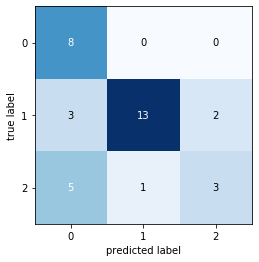

In [110]:
confusion_matrix = metrics.confusion_matrix(Y_test2, ypred_2)
print ("Confusion Matrix k-folds=5\n")

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix)
plt.show()

(143, 2) (143, 3)
(35, 2) (35, 3)
(35, 3)
Average precision-recall score: 0.73


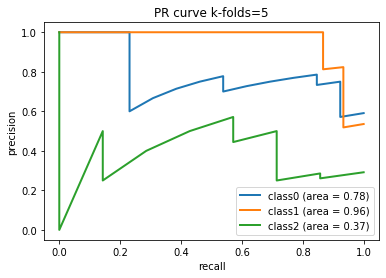

In [111]:
#PC for k-folds, multiclass
x = preprocessing.scale(data)
y = np.array(target).reshape(-1,1)

kf = KFold(n_splits=5, shuffle=True)
clf_svm2 = SVC(C=100, gamma = 'auto', kernel = 'rbf')

#number of classes
n_classes = len(set(target))
Y = label_binarize(target, classes=[*range(n_classes)])

for train, test in kf.split(x, Y):
    #train for k-1 folds
    X_train3 = x[train]
    X_test3 = x[test]
    Y_train3 = Y[train]
    Y_test3 = Y[test]

print(X_train3.shape, Y_train3.shape)
print(X_test3.shape, Y_test3.shape)

classifier = OneVsRestClassifier(clf_svm2)
classifier.fit(X_train3, Y_train3)
y_score = classifier.decision_function(X_test3)
print(y_score.shape)

#PR curve
precision = dict()
recall = dict()
roc_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test3[:, i], y_score[:, i])
    roc_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class{0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

average_precision = average_precision_score(Y_test3, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("PR curve k-folds=5")
plt.show()

(35, 3)
(35, 3)


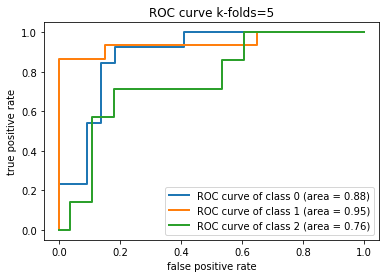

In [112]:
#ROC curve
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
print(Y_test3.shape)
print(y_score.shape)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test3[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve k-folds=5")
plt.show()


### Overall, cross-validation using k-folds gives better results according to the PR and ROC curve. 
### The section below will try to improve the k-folds model by modifying the C, gamma, kernel values and by finding the best number of k-folds.

In [28]:
#improvements for kf = 5
#kernel: ‘rbf’
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

x = preprocessing.scale(data)
y = np.array(target).reshape(-1,1)

kf = KFold(n_splits=5, shuffle=True)

for train, test in kf.split(x, y):
    #train for k-1 folds
    X_train3 = x[train]
    X_test3 = x[test]
    Y_train3 = y[train]
    Y_test3 = y[test]
    
clf_svm3 = SVC(C=1000, gamma = 0.001, kernel = 'rbf')
clf_svm4 = SVC(C=1000, gamma = 0.05, kernel = 'rbf')
clf_svm5 = SVC(C=1000, gamma = 0.1, kernel = 'rbf')
clf_svm6 = SVC(C=1000, gamma = 1, kernel = 'rbf')

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

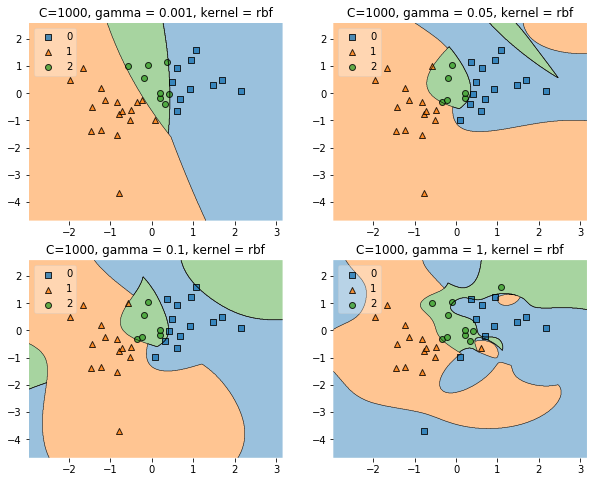

In [36]:
#5 folds
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

X = X_train3
y = Y_train3
Xtest = X_test3

labels = ['C=1000, gamma = 0.001, kernel = rbf', 'C=1000, gamma = 0.05, kernel = rbf', 'C=1000, gamma = 0.1, kernel = rbf', 'C=1000, gamma = 1, kernel = rbf']
for clf, lab, grd in zip([clf_svm3, clf_svm4, clf_svm5, clf_svm6],
                         labels,
                         itertools.product([0, 1], repeat=2) ):

    clf.fit(X, y)
    ypred = clf.predict(Xtest)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xtest, y=ypred, clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [37]:
#10 folds
x = preprocessing.scale(data)
y = np.array(target).reshape(-1,1)
kf = KFold(n_splits=10, shuffle=True)

scores = []
for train, test in kf.split(x, y):
    #train for k-1 folds
    X_train7 = x[train]
    X_test7 = x[test]
    Y_train7 = y[train]
    Y_test7 = y[test]


clf_svm7 = SVC(C=10, gamma = 0.001, kernel = 'rbf')
clf_svm8 = SVC(C=100, gamma = 0.001, kernel = 'rbf')
clf_svm9 = SVC(C=1000, gamma = 0.001, kernel = 'rbf')
clf_svm10 = SVC(C=5000, gamma = 0.001, kernel = 'rbf')

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

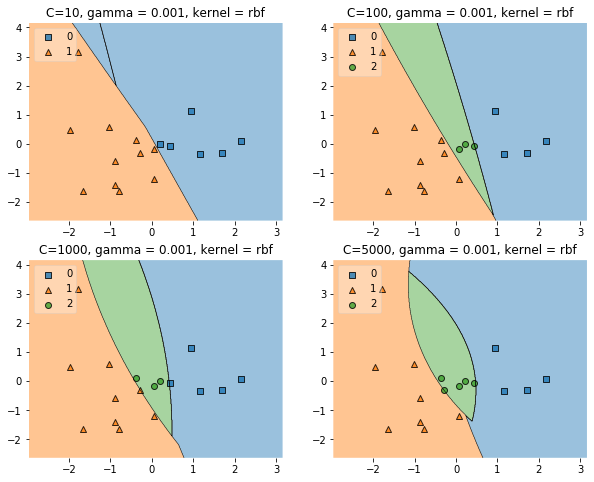

In [38]:
import matplotlib.gridspec as gridspec
from itertools import *

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

X = X_train7
y = Y_train7
Xtest = X_test7

labels = ['C=10, gamma = 0.001, kernel = rbf', 'C=100, gamma = 0.001, kernel = rbf', 'C=1000, gamma = 0.001, kernel = rbf', 'C=5000, gamma = 0.001, kernel = rbf']
for clf, lab, grd in zip([clf_svm7, clf_svm8, clf_svm9, clf_svm10],
                         labels,
                         itertools.product([0, 1], repeat=2) ):

    clf.fit(X, y)
    ypred = clf.predict(Xtest)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xtest, y=ypred, clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [39]:
#20 folds
x = preprocessing.scale(data)
y = np.array(target).reshape(-1,1)
kf = KFold(n_splits=20, shuffle=True)

scores = []
for train, test in kf.split(x, y):
    #train for k-1 folds
    X_train11 = x[train]
    X_test11 = x[test]
    Y_train11 = y[train]
    Y_test11 = y[test]


clf_svm11 = SVC(C=10, gamma = 0.001, kernel = 'rbf')
clf_svm12 = SVC(C=100, gamma = 0.001, kernel = 'rbf')
clf_svm13 = SVC(C=1000, gamma = 0.001, kernel = 'rbf')
clf_svm14 = SVC(C=5000, gamma = 0.001, kernel = 'rbf')

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

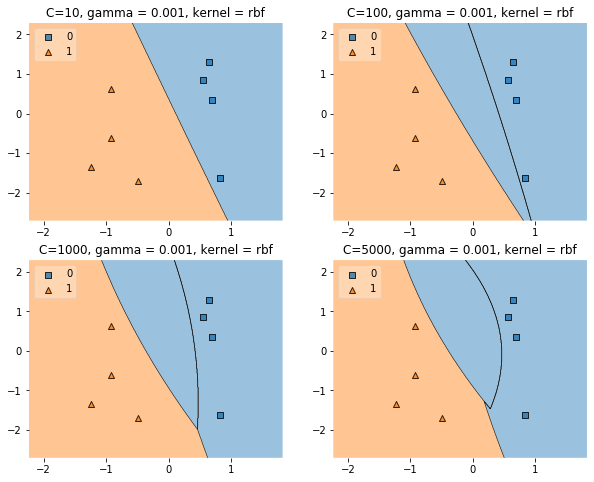

In [40]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

X = X_train11
y = Y_train11
Xtest = X_test11

labels = ['C=10, gamma = 0.001, kernel = rbf', 'C=100, gamma = 0.001, kernel = rbf', 'C=1000, gamma = 0.001, kernel = rbf', 'C=5000, gamma = 0.001, kernel = rbf']
for clf, lab, grd in zip([clf_svm11, clf_svm12, clf_svm13, clf_svm14],
                         labels,
                         itertools.product([0, 1], repeat=2) ):

    clf.fit(X, y)
    ypred = clf.predict(Xtest)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xtest, y=ypred, clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [41]:
#‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
x = preprocessing.scale(data)
y = np.array(target).reshape(-1,1)
#y = preprocessing.scale(y)
kf = KFold(n_splits=10, shuffle=True)

scores = []
for train, test in kf.split(x, y):
    #train for k-1 folds
    X_train15 = x[train]
    X_test15 = x[test]
    Y_train15 = y[train]
    Y_test15 = y[test]


clf_svm15 = SVC(C=1000, gamma = 0.001, kernel = 'linear')
clf_svm16 = SVC(C=1000, gamma = 0.001, kernel = 'poly', degree=2)
clf_svm17 = SVC(C=1000, gamma = 0.001, kernel = 'sigmoid')
clf_svm18 = SVC(C=1000, gamma = 0.001, kernel = 'rbf')

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/util

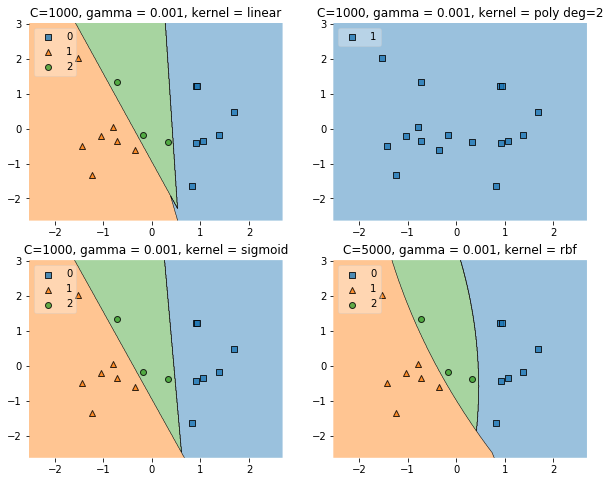

In [42]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

X = X_train15
y = Y_train15
Xtest = X_test15

labels = ['C=1000, gamma = 0.001, kernel = linear', 'C=1000, gamma = 0.001, kernel = poly deg=2', 'C=1000, gamma = 0.001, kernel = sigmoid', 'C=5000, gamma = 0.001, kernel = rbf']
for clf, lab, grd in zip([clf_svm15, clf_svm16, clf_svm17, clf_svm18],
                         labels,
                         itertools.product([0, 1], repeat=2) ):

    clf.fit(X, y)
    ypred = clf.predict(Xtest)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xtest, y=ypred, clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [75]:
#‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
x = preprocessing.scale(data)
y = np.array(target).reshape(-1,1)
kf = KFold(n_splits=10, shuffle=True)

scores = []
for train, test in kf.split(x, y):
    #train for k-1 folds
    X_train15 = x[train]
    X_test15 = x[test]
    Y_train15 = y[train]
    Y_test15 = y[test]


clf_svm19 = SVC(C=1000, gamma = 0.1, kernel = 'sigmoid')
clf_svm20 = SVC(C=1000, gamma = 0.01, kernel = 'sigmoid')
clf_svm21 = SVC(C=1000, gamma = 0.001, kernel = 'sigmoid')
clf_svm22 = SVC(C=5000, gamma = 0.001, kernel = 'sigmoid')

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

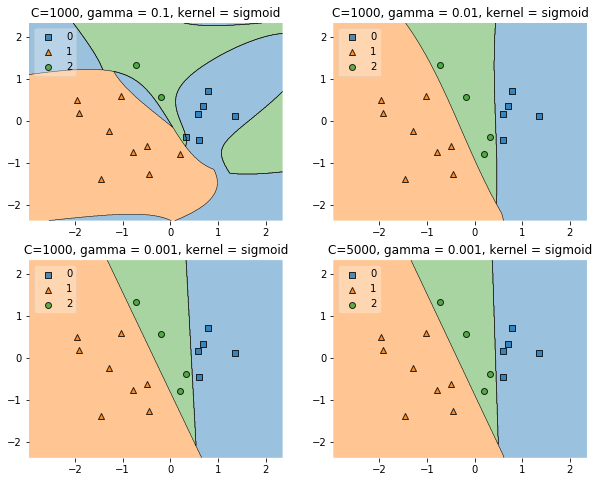

In [76]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

X = X_train15
y = Y_train15
Xtest = X_test15

labels = ['C=1000, gamma = 0.1, kernel = sigmoid', 'C=1000, gamma = 0.01, kernel = sigmoid', 'C=1000, gamma = 0.001, kernel = sigmoid', 'C=5000, gamma = 0.001, kernel = sigmoid']
for clf, lab, grd in zip([clf_svm19, clf_svm20, clf_svm21, clf_svm22],
                         labels,
                         itertools.product([0, 1], repeat=2) ):

    clf.fit(X, y)
    ypred = clf.predict(Xtest)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xtest, y=ypred, clf=clf, legend=2)
    plt.title(lab)

plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/py

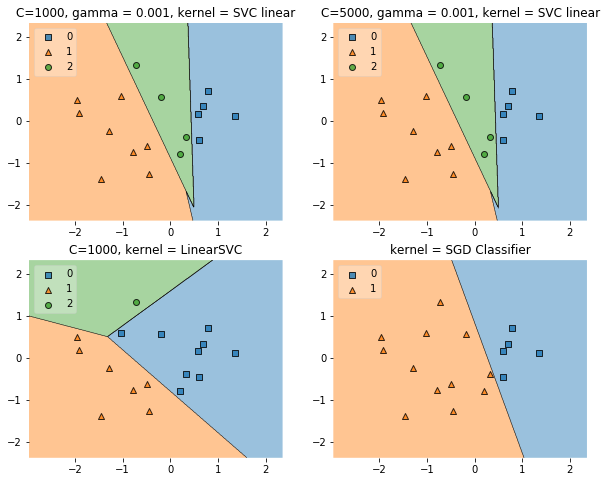

In [88]:
clf_svm23 = SVC(C=1000, gamma = 0.001, kernel = 'linear')
clf_svm24 = SVC(C=5000, gamma = 0.001, kernel = 'linear')
#clf_svm25 = SVC(C=1000, gamma = 0.001, kernel = 'linear')
clf_svm25 = LinearSVC(loss = "hinge", C= 1000)
#clf_svm26 = SVC(C=5000, gamma = 0.001, kernel = 'linear')
clf_svm26 = linear_model.SGDClassifier(loss = "hinge", max_iter=1000, tol=1e-3)


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

X = X_train15
y = Y_train15
Xtest = X_test15

labels = ['C=1000, gamma = 0.001, kernel = SVC linear', 'C=5000, gamma = 0.001, kernel = SVC linear', 'C=1000, kernel = LinearSVC', 'kernel = SGD Classifier']
for clf, lab, grd in zip([clf_svm23, clf_svm24, clf_svm25, clf_svm26],
                         labels,
                         itertools.product([0, 1], repeat=2) ):

    clf.fit(X, y)
    ypred = clf.predict(Xtest)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xtest, y=ypred, clf=clf, legend=2)
    plt.title(lab)

plt.show()


#### The best five candidates are identified as the following:
    1.  C=1000, gamma = 0.001, kernel = SVC linear
    2.  C=1000, kernel = LinearSVC
    3.  C = 1000, gamma = 0.001, kernel = rbf, 10 k-folds
    4.  C = 5000, gamma = 0.001, kernel = rbf, 10 k-folds
    5.  C = 1000, gamma = 0.001, kernel = sigmoid, 10 k-folds
####  The section below evaluates the PR, ROC and coefficient matrix for all of them.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix  C = 1000, gamma = 0.01, kernel = linear, 10 k-folds



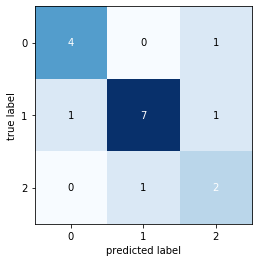

In [103]:
#quantify PR, ROC, coefficient matrix for C = 1000, gamma = 0.01, kernel = linear, 10 k-folds
clf_svm27 = SVC(C=1000, gamma = 0.001, kernel = 'linear')

X = X_train15
y = Y_train15
Xtest = X_test15
Ytest=Y_test15

clf_svm27.fit(X, y)
ypred27 = clf_svm27.predict(Xtest)

confusion_matrix = metrics.confusion_matrix(Ytest, ypred27)
print ("Confusion Matrix  C = 1000, gamma = 0.01, kernel = linear, 10 k-folds\n")

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix)
plt.show()



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix LinearSVC, C= 1000) 



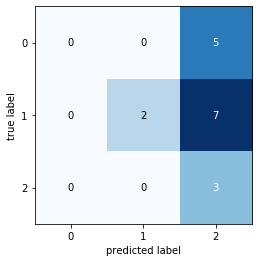

In [102]:
#quantify PR, ROC, coefficient matrix for C = 1000,  kernel = LinearSVC, 10 k-folds
clf_svm35 = LinearSVC(loss = "hinge", C= 1000)

X = X_train15
y = Y_train15
Xtest = X_test15
Ytest=Y_test15

clf_svm35.fit(X, y)
ypred35 = clf_svm35.predict(Xtest)

confusion_matrix = metrics.confusion_matrix(Ytest, ypred35)
print ("Confusion Matrix LinearSVC, C= 1000) \n")

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix)
plt.show()



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix C = 1000, gamma = 0.01, kernel = rbf, 10 k-folds



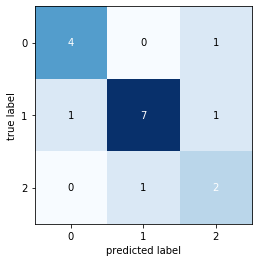

In [101]:
#confusion matrix for C = 1000, gamma = 0.01, kernel = rbf, 10 k-folds
clf_svm28 = SVC(C=1000, gamma = 0.001, kernel = 'rbf')

X = X_train15
y = Y_train15
Xtest = X_test15
Ytest=Y_test15

clf_svm28.fit(X, y)
ypred28 = clf_svm28.predict(Xtest)

confusion_matrix = metrics.confusion_matrix(Ytest, ypred28)
print ("Confusion Matrix C = 1000, gamma = 0.01, kernel = rbf, 10 k-folds\n")

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix)
plt.show()



Confusion Matrix C = 5000, gamma = 0.01, kernel = rbf, 10 k-folds



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


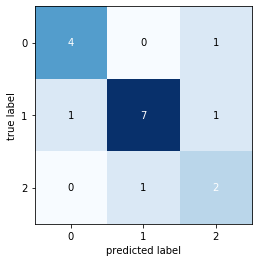

In [114]:
#confusion matrix for C = 5000, gamma = 0.01, kernel = rbf, 10 k-folds
clf_svm29 = SVC(C=5000, gamma = 0.001, kernel = 'rbf')

X = X_train15
y = Y_train15
Xtest = X_test15
Ytest=Y_test15

clf_svm29.fit(X, y)
ypred29 = clf_svm29.predict(Xtest)

confusion_matrix = metrics.confusion_matrix(Ytest, ypred29)
print ("Confusion Matrix C = 5000, gamma = 0.01, kernel = rbf, 10 k-folds\n")

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix)
plt.show()


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix C = 1000, gamma = 0.001, kernel = sigmoid, 10 k-folds



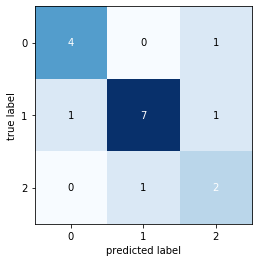

In [99]:
#C = 1000, gamma = 0.001, kernel = sigmoid, 10 k-folds
clf_svm36 = SVC(C=1000, gamma = 0.001, kernel = 'sigmoid')

X = X_train15
y = Y_train15
Xtest = X_test15
Ytest=Y_test15

clf_svm36.fit(X, y)
ypred36 = clf_svm36.predict(Xtest)

confusion_matrix = metrics.confusion_matrix(Ytest, ypred36)
print ("Confusion Matrix C = 1000, gamma = 0.001, kernel = sigmoid, 10 k-folds\n")

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix)
plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Average precision-recall score: 0.77


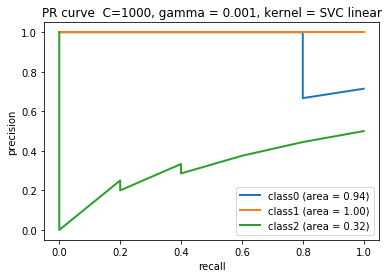

Average precision-recall score: 0.95


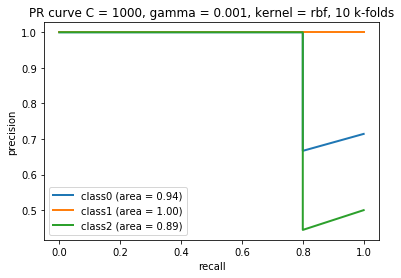

Average precision-recall score: 0.97


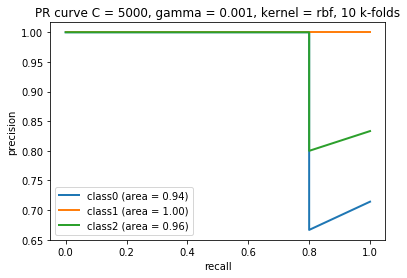

Average precision-recall score: 0.70


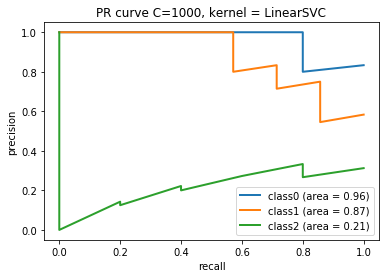

Average precision-recall score: 0.73


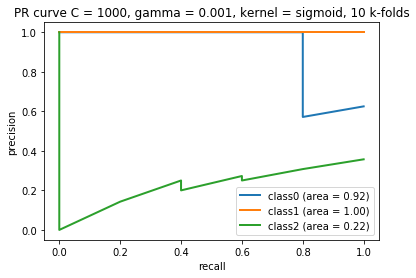

In [104]:
#1.  C=1000, gamma = 0.001, kernel = SVC linear
#2.  C=1000, kernel = LinearSVC
#3.  C = 1000, gamma = 0.001, kernel = rbf, 10 k-folds
#4.  C = 5000, gamma = 0.001, kernel = rbf, 10 k-folds
#5.  C = 1000, gamma = 0.001, kernel = sigmoid, 10 k-folds

#PR 
x = preprocessing.scale(data)
y = np.array(target).reshape(-1,1)
kf = KFold(n_splits=10, shuffle=True)

#number of classes
n_classes = len(set(target))
Y = label_binarize(target, classes=[*range(n_classes)])

#re-split data
for train, test in kf.split(x, Y):
    #train for k-1 folds
    X_train27 = x[train]
    X_test27 = x[test]
    Y_train27 = Y[train]
    Y_test27 = Y[test]

classifier_1 = OneVsRestClassifier(clf_svm27)
classifier_1.fit(X_train27, Y_train27)
y_score_1 = classifier_1.decision_function(X_test27)

classifier_2 = OneVsRestClassifier(clf_svm28)
classifier_2.fit(X_train27, Y_train27)
y_score_2 = classifier_2.decision_function(X_test27)

classifier_3 = OneVsRestClassifier(clf_svm29)
classifier_3.fit(X_train27, Y_train27)
y_score_3 = classifier_3.decision_function(X_test27)

classifier_4 = OneVsRestClassifier(clf_svm35)
classifier_4.fit(X_train27, Y_train27)
y_score_4 = classifier_4.decision_function(X_test27)

classifier_5 = OneVsRestClassifier(clf_svm36)
classifier_5.fit(X_train27, Y_train27)
y_score_5 = classifier_5.decision_function(X_test27)

#PR curve 1
precision = dict()
recall = dict()
roc_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test27[:, i], y_score_1[:, i])
    roc_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class{0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

average_precision_1 = average_precision_score(Y_test27, y_score_1)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_1))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("PR curve  C=1000, gamma = 0.001, kernel = SVC linear")
plt.show()

#PR curve 2
precision = dict()
recall = dict()
roc_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test27[:, i], y_score_2[:, i])
    roc_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class{0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

average_precision_2 = average_precision_score(Y_test27, y_score_2)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_2))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("PR curve C = 1000, gamma = 0.001, kernel = rbf, 10 k-folds")
plt.show()

#PR curve 3
precision = dict()
recall = dict()
roc_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test27[:, i], y_score_3[:, i])
    roc_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class{0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

average_precision_3 = average_precision_score(Y_test27, y_score_3)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_3))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("PR curve C = 5000, gamma = 0.001, kernel = rbf, 10 k-folds")
plt.show()

#PR curve 4
precision = dict()
recall = dict()
roc_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test27[:, i], y_score_4[:, i])
    roc_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class{0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

average_precision_4 = average_precision_score(Y_test27, y_score_4)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_4))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("PR curve C=1000, kernel = LinearSVC")
plt.show()

#PR curve 5
precision = dict()
recall = dict()
roc_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test27[:, i], y_score_5[:, i])
    roc_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class{0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

average_precision_5 = average_precision_score(Y_test27, y_score_5)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_5))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("PR curve C = 1000, gamma = 0.001, kernel = sigmoid, 10 k-folds")
plt.show()

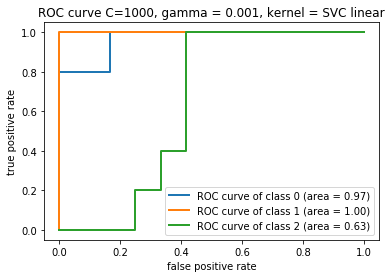

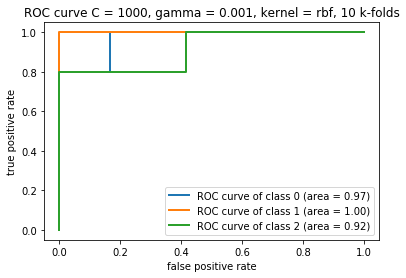

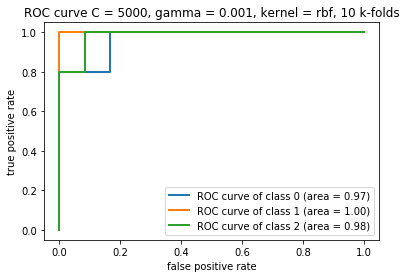

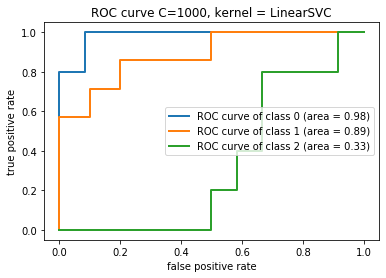

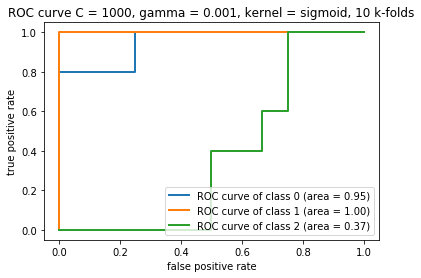

In [105]:
#1.  C=1000, gamma = 0.001, kernel = SVC linear
#2.  C=1000, kernel = LinearSVC
#3.  C = 1000, gamma = 0.001, kernel = rbf, 10 k-folds
#4.  C = 5000, gamma = 0.001, kernel = rbf, 10 k-folds
#5.  C = 1000, gamma = 0.001, kernel = sigmoid, 10 k-folds


#ROC
#ROC curve 1
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test27[:, i], y_score_1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve C=1000, gamma = 0.001, kernel = SVC linear")
plt.show()

#ROC curve 2
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test27[:, i], y_score_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve C = 1000, gamma = 0.001, kernel = rbf, 10 k-folds")
plt.show()

#ROC curve 3
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test27[:, i], y_score_3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve C = 5000, gamma = 0.001, kernel = rbf, 10 k-folds")
plt.show()

#ROC curve 4
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test27[:, i], y_score_4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve C=1000, kernel = LinearSVC")
plt.show()

#ROC curve 5
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test27[:, i], y_score_5[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve C = 1000, gamma = 0.001, kernel = sigmoid, 10 k-folds")
plt.show()